### Monte carlo simulation for pricing derivatives

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

import cufflinks as cf
cf.set_config_file(offline = True)

import warnings as wn
wn.filterwarnings('ignore')

In [2]:
def GBM(S0, rf, T, vol, nsteps, nsims):

  
    dt = T/nsteps                       # time steps we are taking say, we want to do daily simulation that means nsteps = 252
    
    S = np.zeros((nsims,nsteps+1))     # just a initialisation of values'S' will take , for now we assume it to be all zero, remember the excel framework of simulation shown by sir
    
    S[:,0] = S0
    
    for i in range (nsteps):
        
        phi = np.random.randn(nsims)     # just a first column vector of 'z'(standard normal) values initiated , its like normsinv(rand) in excel
        
        S[:,i+1] = S[:,i]*np.exp((rf-0.5*vol*vol)*dt + vol*phi*np.sqrt(dt))
        
    return S                              # S is a two dimensional numpy array

    
 
    

In [3]:
S0 = 100
K = 100
rf= 0.05
T = 1
vol = 0.25

In [24]:
nsteps = 12
nsims = 100000

S = pd.DataFrame(GBM(S0, rf, T, vol, nsteps,nsims))
S

0           1           2           3           4           5   \
0      100.0   99.783499   93.708523   91.881734   95.614100   94.543162   
1      100.0  119.987297  117.695610  106.613661  104.004017  139.710593   
2      100.0  102.581192  112.493486  111.231115  119.681292  116.028437   
3      100.0   88.801032   92.528520   82.906896   97.163402   87.303890   
4      100.0  105.897430  121.266259  118.396858  120.471923  137.248431   
...      ...         ...         ...         ...         ...         ...   
99995  100.0  101.840363   96.771132   88.804753   83.161122   82.746542   
99996  100.0  100.768198   89.812867   86.362297   89.525866   83.644474   
99997  100.0  102.010994  105.684524  104.518303   91.909664   96.450759   
99998  100.0  103.923782   94.834527   93.756770  100.226188  104.974806   
99999  100.0   94.337075   87.937613   93.005166   80.841397   82.401590   

               6           7           8           9           10          11  \
0       95.577439   92.398466   94.923764  104.966132   97.901528   89.096169   
1      124.456039  122.321262  124.533040  133.842247  121.144066  116.064593   
2      112.656556  121.535499  129.071670  126.604324  140.675240  133.553935   
3       96.681840  112.347897  121.540027  121.595428  111.434490  108.261279   
4      124.104437  111.952654  107.112339   97.507224  104.992334   96.820711   
...           ...         ...         ...         ...         ...         ...   
99995   78.208091   82.191147   88.963849   91.027898   96.054540  108.199499   
99996   91.107277   99.463113   94.503394   86.040384   75.442935   73.834585   
99997   98.174521   97.083288   92.625043   86.848959   93.639115   85.198048   
99998  110.110773  101.908059  109.014121  107.591598  104.927052  116.459841   
99999   86.008496   82.705798   88.054519   89.177730   90.912505   83.495639   

               12  
0       83.088136  
1      132.407178  
2      139.239145  
3      109.860621  
4       96.382019  
...           ...  
99995  113.546917  
99996   89.368809  
99997   84.100094  
99998  109.721963  
99999   92.408698  

[100000 rows x 13 columns]

In [5]:
S.iloc[:100,:].T.iplot()    # we do transpose because of the way our data above is simulated

In [6]:
S.iloc[:,12:13].iplot('hist')

In [25]:
payoff = np.maximum(S.iloc[:,-1]-K,0)
payoff

0         0.000000
1        32.407178
2        39.239145
3         9.860621
4         0.000000
           ...    
99995    13.546917
99996     0.000000
99997     0.000000
99998     9.721963
99999     0.000000
Name: 12, Length: 100000, dtype: float64

In [26]:
##  European Call option pricing using Montecarlo simulation

C_MCS = np.exp(-rf*T)*payoff.mean()    # expected discounted value
C_MCS

12.361290502374768

In [9]:
## Black-scholes pricing of European call option

d1 = (np.log(S0/K) + (rf+0.5*vol*vol)*T)/(vol*np.sqrt(T))
d2 = d1 - vol*np.sqrt(T)

C_BSM = S0*norm.cdf(d1) - norm.cdf(d2)*K*np.exp(-rf*T)
C_BSM

12.335998930368717

In [10]:
##  Now lets price an Asian option
## C_Asian = ( Savg - K,0)

S_avg = S.mean(axis = 1)           # per row we want one mean i.e. avg of 12 values stock takes that is why we take axis = 1
Payoff_asian = np.maximum(S_avg - K, 0)
Payoff_asian

0         0.000000
1        25.214566
2         0.000000
3         0.000000
4         0.000000
           ...    
99995     0.000000
99996    22.082871
99997    17.383584
99998    51.557503
99999     5.458999
Length: 100000, dtype: float64

In [11]:
C_asian  = Payoff_asian.mean()/np.exp(rf*T)
C_asian     # value comes out as less than plain vanilla pricing because terminal price will have more volatility than average of price path the stock evolves through

6.765382113869041

### Now lets delve into Risk Management application of Monte carlo Simulation

In [12]:
# Calculating VaR of a Portfolio using Mont carlo

# VaR is a static measure which measures the maximum loss a portfolio can experience for a given confidence interval at a given liquidity horizon

# 10 day VaR @95 = $100 , means P[10 day loss > 100 = 5%] or P[10 day loss<100 = 95%]

# We need a return/Loss(PnL) distribution and then cut a quantile of desired significance level


In [13]:
# Three methods of finding VaR 
  
  ## Parametric VaR - we assume returns follow a normal distribution and according to parameters of normal dist. we calculate VaR
  
  ## Historical simulation - we generate return distribution from historical data and apply those return in current portfolio as if history will repeat itself
  
  ## Monte Carlo VaR - we generate return distribution using random numbers 
    

In [14]:
# Lets define parameters
# scalar parameters 

mu1 = 0.1
mu2 = 0.15
sigma1 = 0.1
sigma2 = 0.2 
rho = 0.5   # correlation 
w = 0.4     # weight of one instrument


# creating matrix 

MU = np.array([[mu1,mu2]]).T        # By default numpy array is designed in row fashion but we require it in column fashion( just a convention of vector matrix)
COV = np.array([[sigma1**2,rho*sigma1*sigma2],[rho*sigma1*sigma2,sigma2**2]])     # creating a  variance-covariance matrix
W = np.array([[w,1-w]]).T


In [15]:
# calculate paarametric VaR

z = norm.ppf(0.95)     # x = mu - z*sigma as we are getting positive z

# we need portfolio expected return

mu_p = (W.T@MU).item() 

# we calculate portfolio standard deviation

sigma_p = np.sqrt(W.T@COV@W).item()   # we do squareroot of weights transpose * var-cov maatrix * weights 

# now finally lets calculate paarametric VaR

VaR = mu_p - sigma_p * z   # we arrive at this quantile from a return distribution 
VaR                        # the VaR we arrived at is a worst case returns and after we apply this return in our portfolio we get a absolute value

-0.107224163704258

In [16]:
# calculate Monte carlo VaR 

# r1 ~ N(mu1,sigma1**2), r2 ~ N(mu2,sigma2**2)

sims = 10000


# first we need to generate uncorrelated random numbers 

z1 = np.random.randn(sims)
z2 = np.random.randn(sims)

r1_uncor = mu1 + sigma1*z1
r2_uncor = mu2 + sigma2*z2
# now generate correlated random numbers using z1 and z2

z3 = z1 * rho + np.sqrt(1-rho**2)*z2  

np.corrcoef(z1,z3)  # checking whether correlation is introduced



array([[1.        , 0.50191748],
       [0.50191748, 1.        ]])

In [17]:
r1 = mu1 + sigma1*z1
r2 = mu2 + sigma2*z3

np.corrcoef(r1,r2)


array([[1.        , 0.50191748],
       [0.50191748, 1.        ]])

In [18]:
r = pd.DataFrame()
r['r1'] = r1
r['r2'] = r2
r

r1        r2
0     0.142579  0.276823
1     0.280394  0.157518
2     0.320628  0.300952
3     0.077066  0.108563
4     0.070081  0.026826
...        ...       ...
9995  0.138541  0.189375
9996  0.129165  0.212376
9997 -0.110987 -0.094642
9998  0.014863  0.172665
9999  0.040381  0.164357

[10000 rows x 2 columns]

Text(0, 0.5, 'r2')

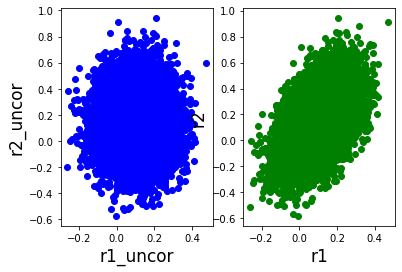

In [19]:
# generate plots to visualise correlation

# for uncorrelated random variable
plt.subplot(1,2,1)
plt.plot(r1_uncor,r2_uncor,linestyle = "",marker = "o", color = "blue")
plt.xlabel('r1_uncor', fontsize = 17)
plt.ylabel('r2_uncor', fontsize = 17)


# for correlated random variable

plt.subplot(1,2,2)
plt.plot(r1,r2, linestyle = "", marker = "o", color = "green")
plt.xlabel('r1', fontsize = 17)
plt.ylabel('r2', fontsize = 17)



In [20]:
r['rp'] = r@W   # we found out return portfolio simply by weighing returns  
r 

r1        r2        rp
0     0.142579  0.276823  0.223125
1     0.280394  0.157518  0.206669
2     0.320628  0.300952  0.308822
3     0.077066  0.108563  0.095964
4     0.070081  0.026826  0.044128
...        ...       ...       ...
9995  0.138541  0.189375  0.169042
9996  0.129165  0.212376  0.179092
9997 -0.110987 -0.094642 -0.101180
9998  0.014863  0.172665  0.109544
9999  0.040381  0.164357  0.114766

[10000 rows x 3 columns]

In [21]:
r['rp'].iplot('hist')

In [22]:
np.quantile(r['rp'],0.05)  # VaR by simulation result , close to analytical solution but not exact due to less number of simulations


-0.10887258527985341